# Step 1: Install and Import Required Libraries

In [32]:

!pip install -q nltk
import nltk
nltk.download('movie_reviews')

import random
import numpy as np
import pandas as pd

from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


# Step 2: Load the IMDb Movie Reviews Dataset (Inbuilt in nltk)

In [33]:

# Each file has a category: pos (positive) or neg (negative)

documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle documents for randomness
random.shuffle(documents)

# Separate text and labels
texts = [doc for doc, _ in documents]
labels = [label for _, label in documents]


# Step 3: Encode Labels (pos = 1, neg = 0)

In [34]:

label_map = {'pos': 1, 'neg': 0}
y = [label_map[label] for label in labels]

# Step 4: Split Data into Train and Test Sets

In [35]:

X_train, X_test, y_train, y_test = train_test_split(
    texts, y, test_size=0.2, random_state=42
)

# Step 5: Text Vectorization using TF-IDF

In [36]:

# Removes stop words and limits features for better performance
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train a Logistic Regression Model

In [37]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

# Step 7: Make Predictions

In [38]:

y_pred = model.predict(X_test_vec)

# Step 8: Evaluate the Model

Accuracy Score: 0.8225

Confusion Matrix:


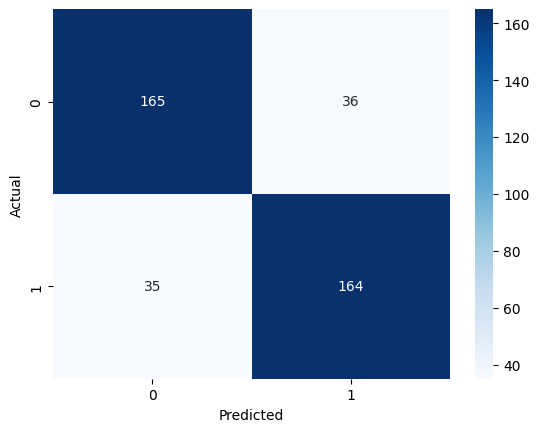


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       201
           1       0.82      0.82      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [39]:

# Accuracy, Confusion Matrix, and Classification Report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Show Top Features for Each Sentiment

In [40]:

# Helpful for insight into what the model learned
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

top_positive = np.argsort(coef)[-10:][::-1]
top_negative = np.argsort(coef)[:10]

print("Top Positive Words:")
for i in top_positive:
    print(f"{feature_names[i]} ({coef[i]:.2f})")

print("\nTop Negative Words:")
for i in top_negative:
    print(f"{feature_names[i]} ({coef[i]:.2f})")

Top Positive Words:
life (1.58)
great (1.54)
seen (1.13)
family (1.12)
war (1.05)
excellent (1.03)
mulan (1.03)
jackie (1.01)
hilarious (0.97)
memorable (0.97)

Top Negative Words:
bad (-3.31)
worst (-1.82)
plot (-1.75)
boring (-1.59)
movie (-1.44)
stupid (-1.39)
waste (-1.33)
supposed (-1.30)
unfortunately (-1.29)
script (-1.25)
